In [7]:
!wget -nc https://raw.githubusercontent.com/Jegovila/SSPIA1/main/3%20Algoritmos%20Gen%C3%A9ticos/C%C3%B3digos/Plot_Surf.py
!wget -nc https://raw.githubusercontent.com/Jegovila/SSPIA1/main/3%20Algoritmos%20Gen%C3%A9ticos/C%C3%B3digos/Plot_Contour.py

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

File ‘Plot_Surf.py’ already there; not retrieving.

File ‘Plot_Contour.py’ already there; not retrieving.



In [8]:
def Seleccion(aptitud):

    # Solo elegir una de estas dos variantes
    torneo = False
    rank = False

    if torneo:
        N = (aptitud.size)
        tao = int(np.round(N * 0.3))

        I = np.random.randint(0, N, tao)
        idx = np.argmax(aptitud[I])
        n = I[idx]
        return n
    elif rank:
        Idx = np.argsort(aptitud)
        Idx = Idx[::-1]
        N = (aptitud.size)

        rank = np.arange(N,-1,-1)
        rank_total = np.sum(rank)

        r = np.random.rand()
        p_sum = 0

        for i in range(N):
            p_sum = p_sum + rank[i] / rank_total

        if p_sum >= r:
            n = Idx[i]
            return n

        n = N
        return n

    # Selección sin variantes
    aptitud_total = np.sum(aptitud)
    N = (aptitud.size)

    r = np.random.rand()
    p_sum = 0

    for i in range(N):
        p_sum = p_sum + aptitud[i] / aptitud_total

        if p_sum >= r:
            n = i
            return n

    n = N
    return n

In [19]:
def Cruza(x1, x2):
    D = x1.size
    pc = np.random.randint(0, D)

    y1 = x1.copy()
    y2 = x2.copy()

    y1[pc:] = x2[pc:]
    y2[pc:] = x1[pc:]
    return y1, y2

In [10]:
def Mutacion(y, pm, x=None, xu=None):
    normal = False

    D, N = y.shape

    for i in range(N):
        for j in range(D):
            if np.random.rand() < pm:
                if normal or algoritmo == 'elitism':
                    y[j,i] = y[j,i] + np.random.normal(0, 1)
            else:
                y[j,i] = xl[j] + (xu[j] - xl[j]) * np.random.rand()
    return y

In [21]:
# Parámetros
f = lambda x, y: x * np.e ** (-x ** 2 -y ** 2)
fx = lambda x: (x - 2) ** 2
xl = np.array([-2, -2])
xu = np.array([2, 2])

N = 50 # Población, debe ser par
E = 10
D = 2
G = 100
pm = 0.01

In [12]:
algoritmo = 'ga'

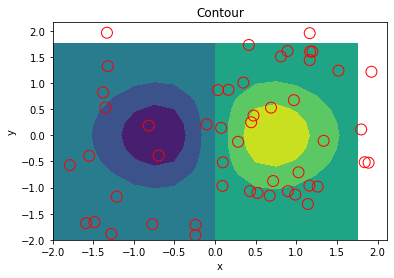

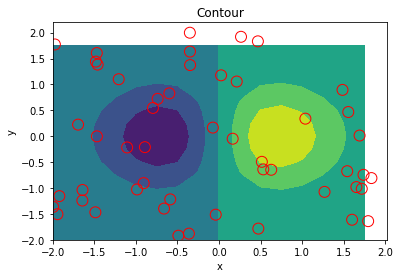

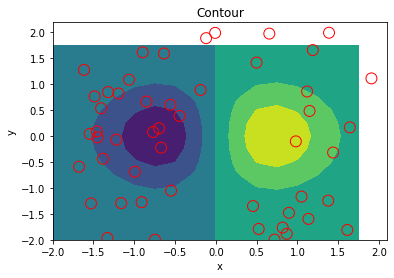

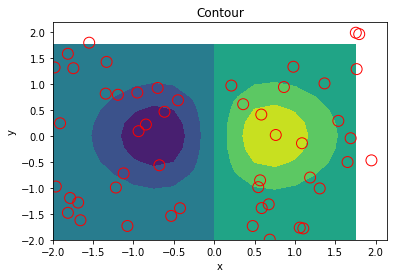

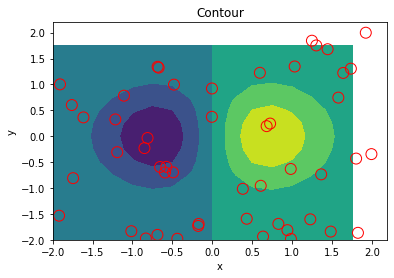

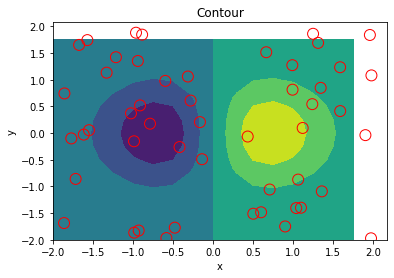

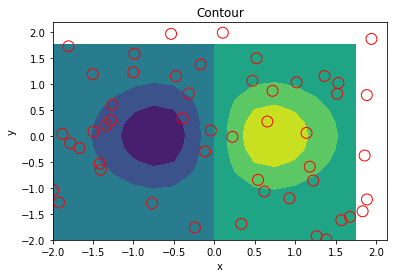

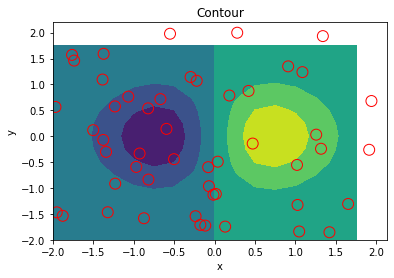

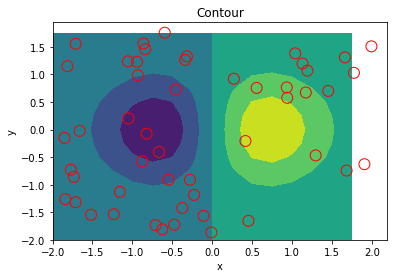

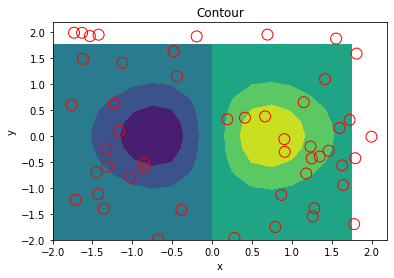

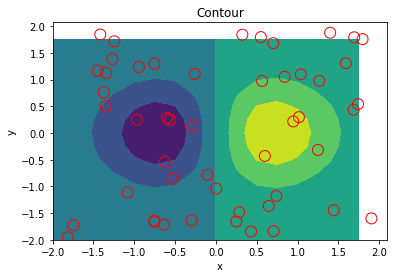

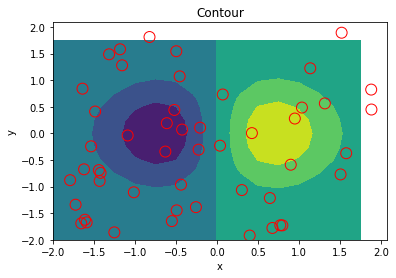

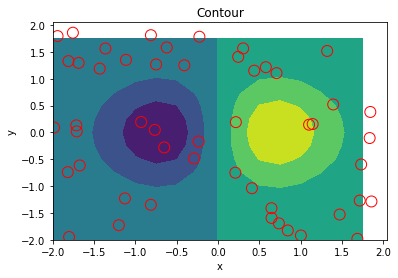

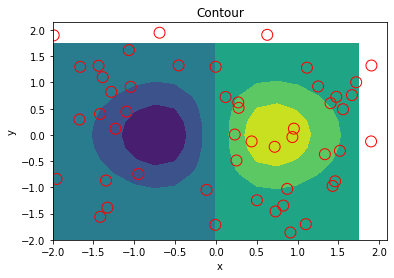

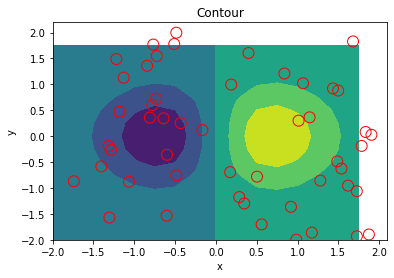

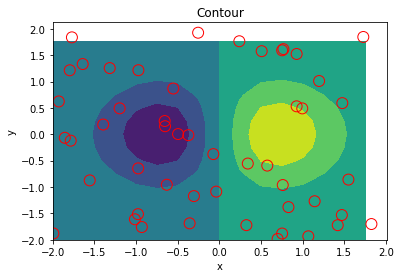

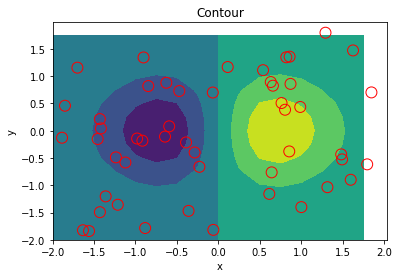

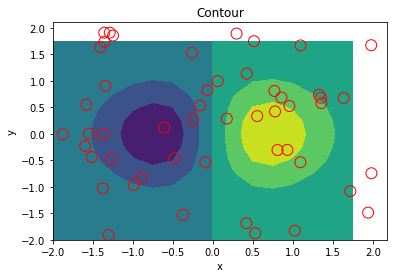

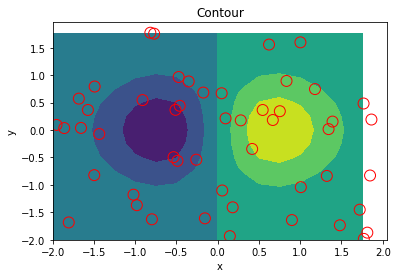

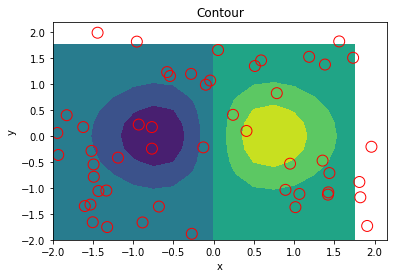

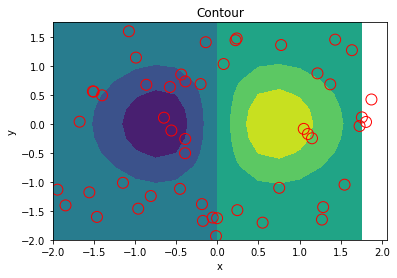

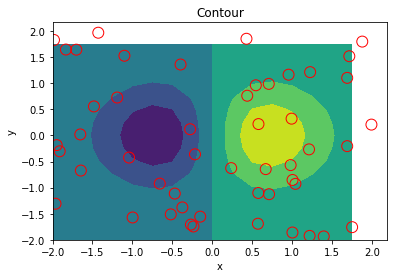

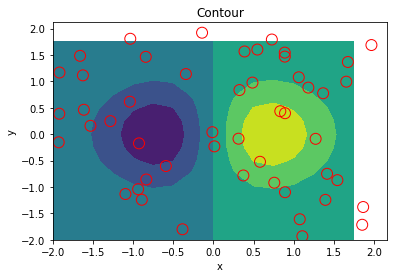

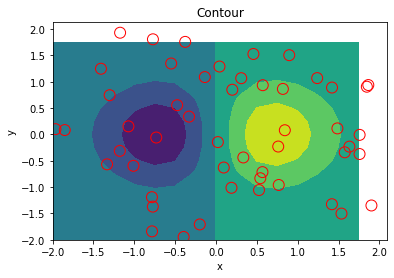

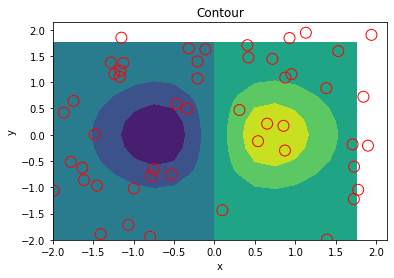

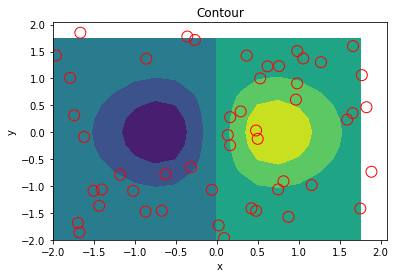

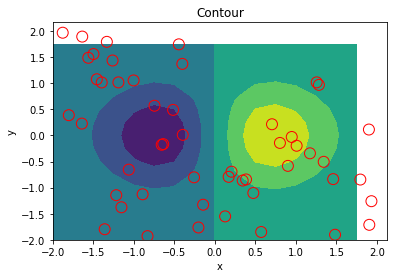

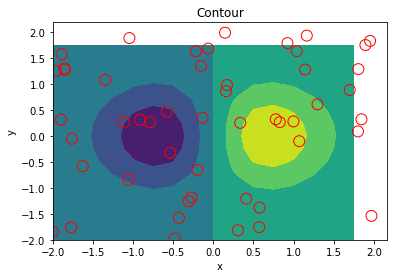

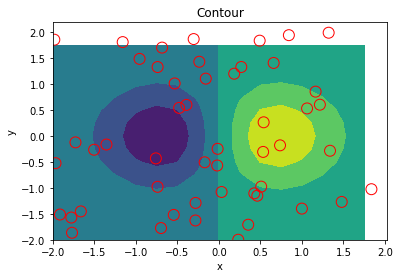

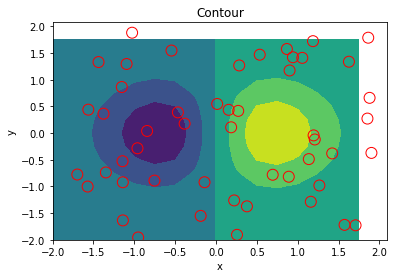

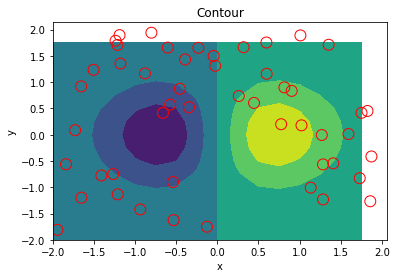

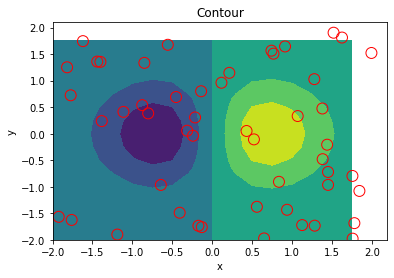

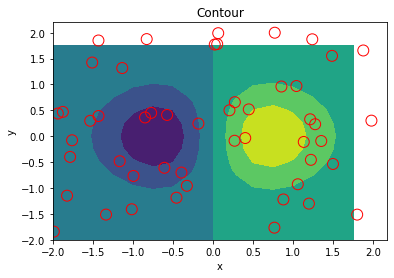

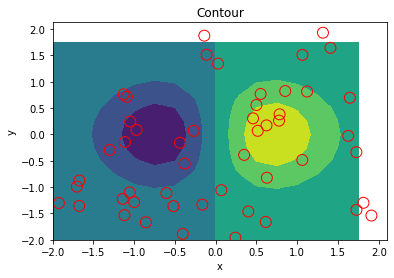

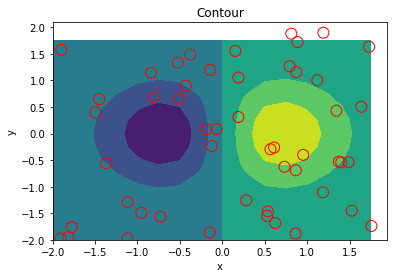

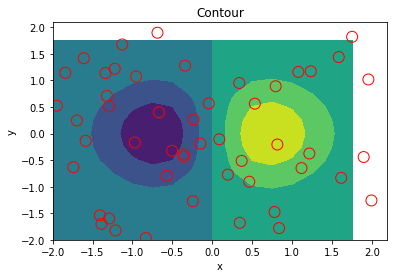

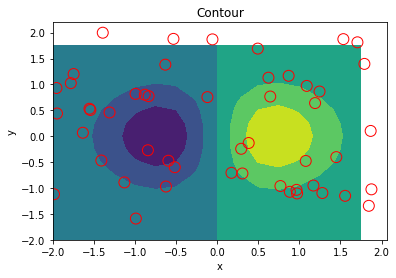

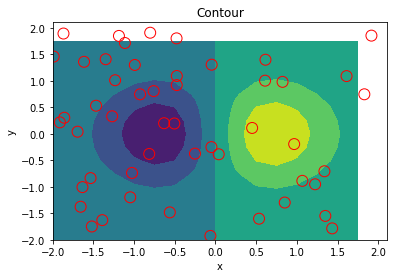

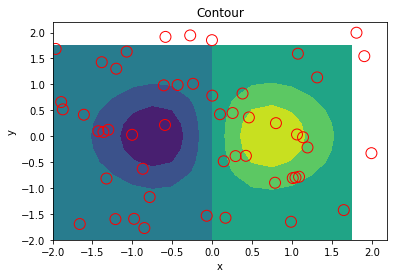

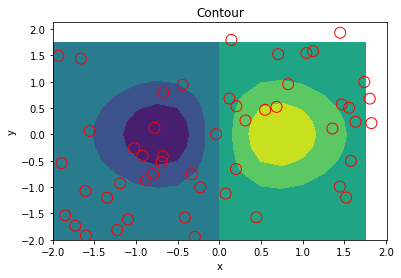

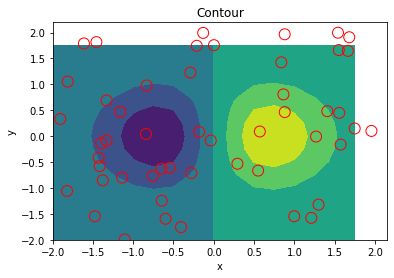

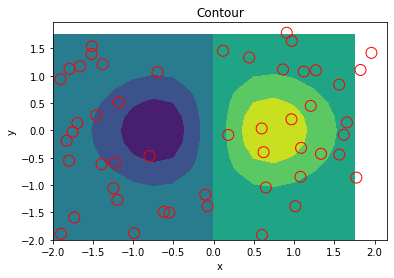

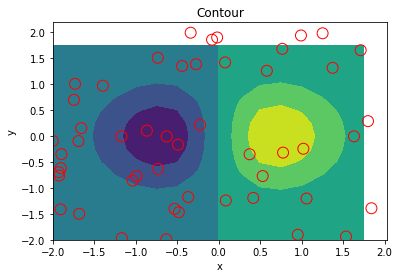

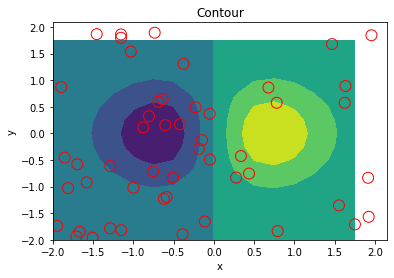

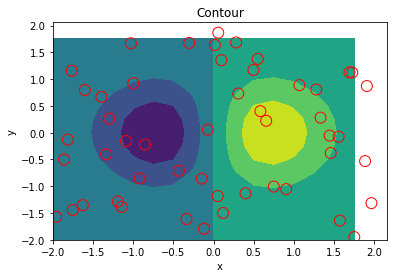

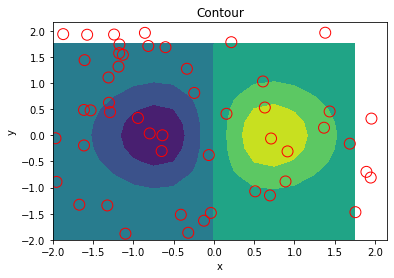

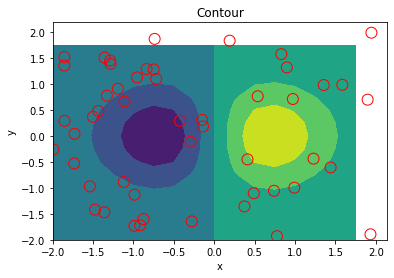

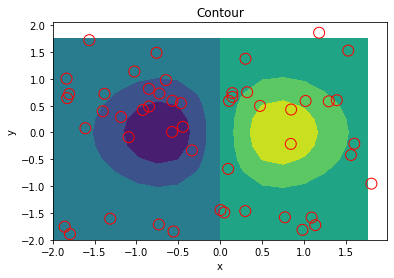

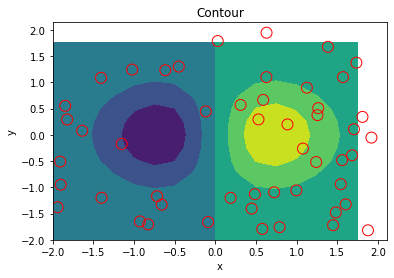

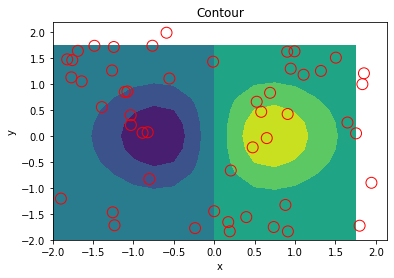

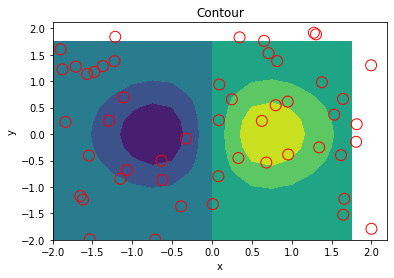

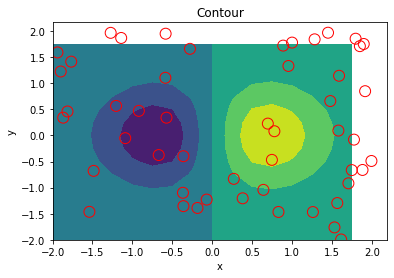

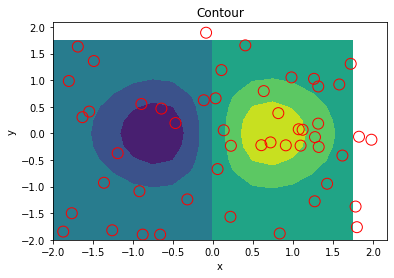

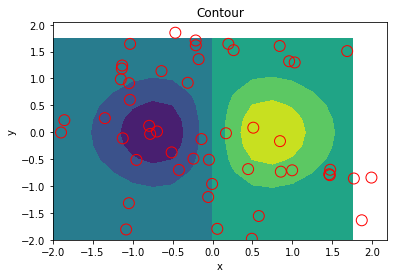

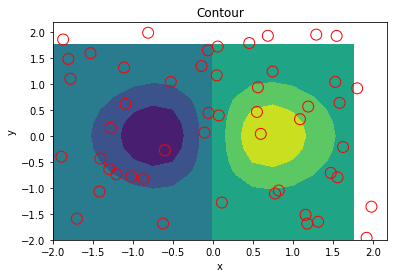

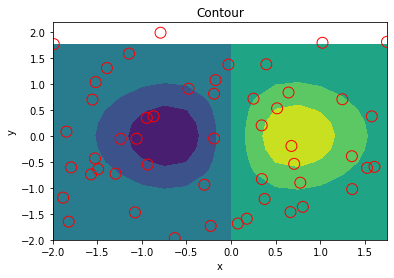

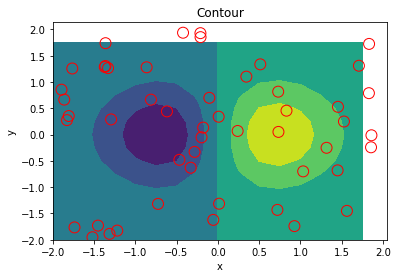

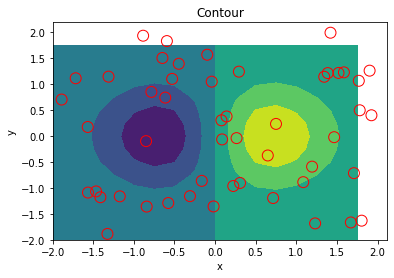

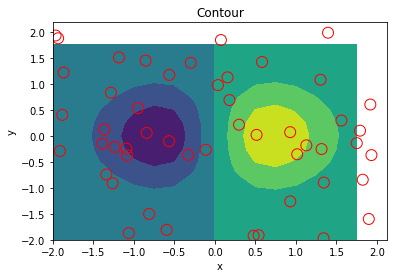

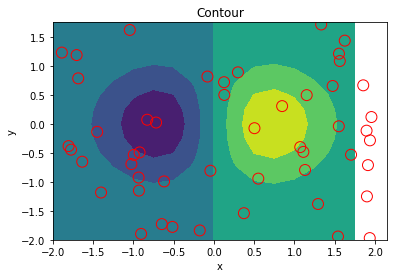

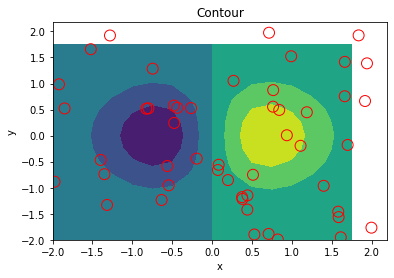

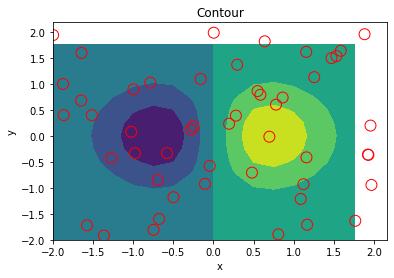

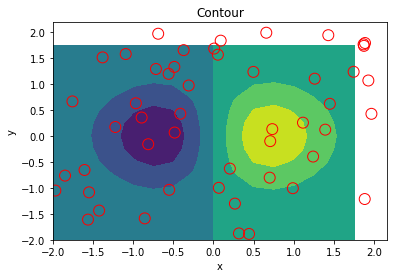

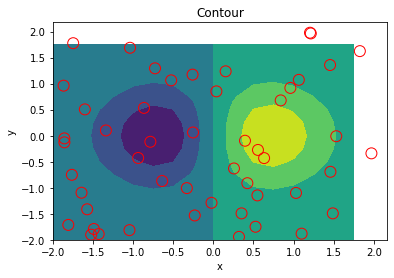

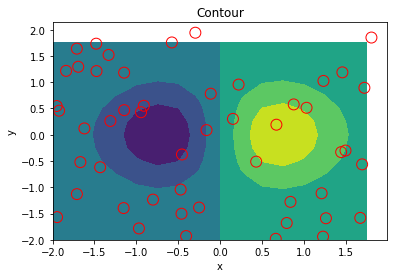

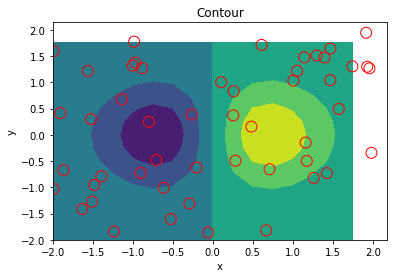

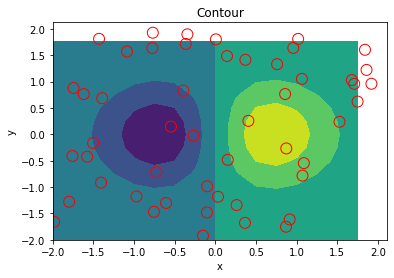

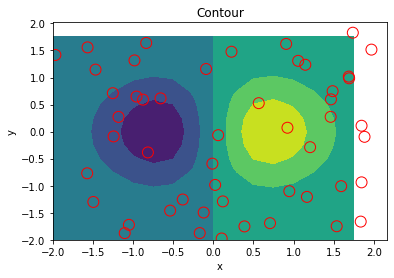

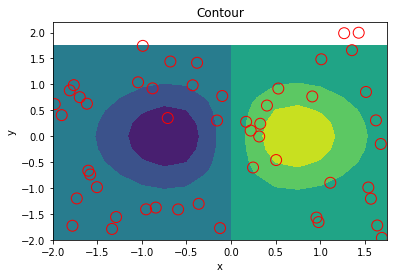

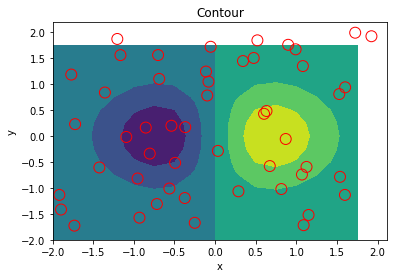

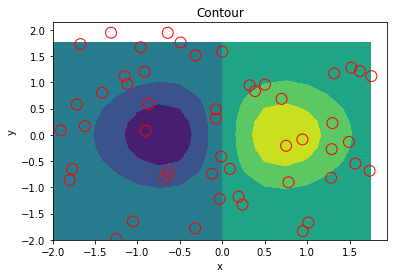

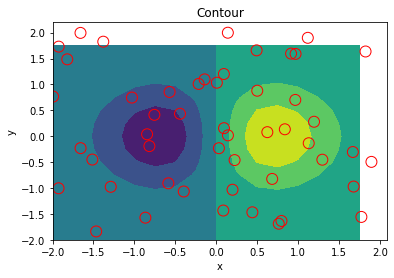

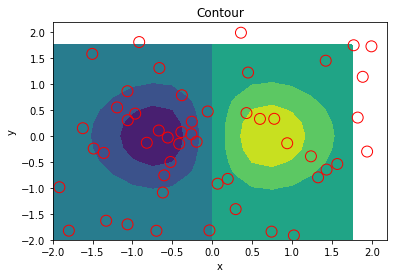

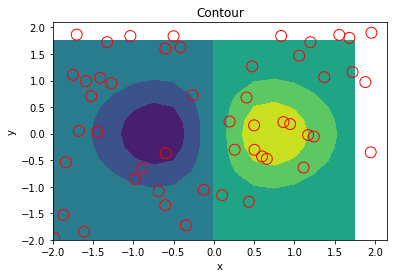

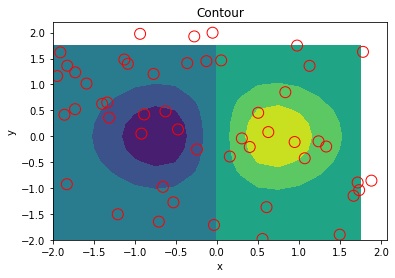

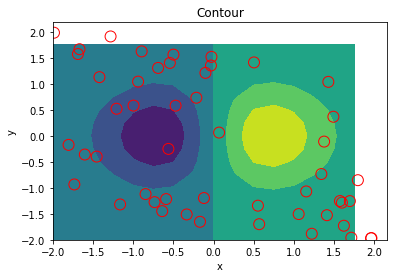

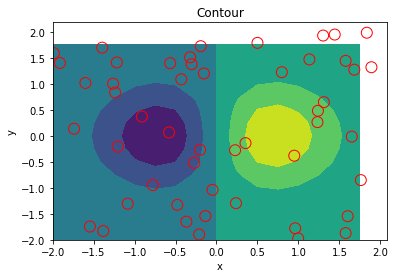

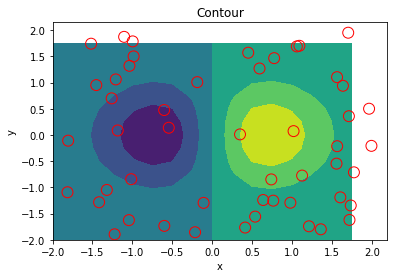

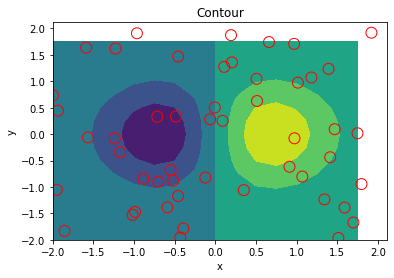

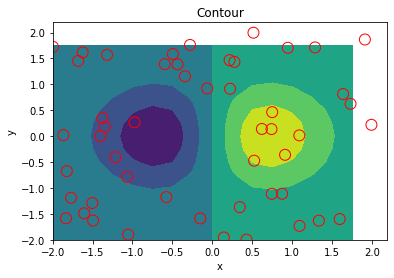

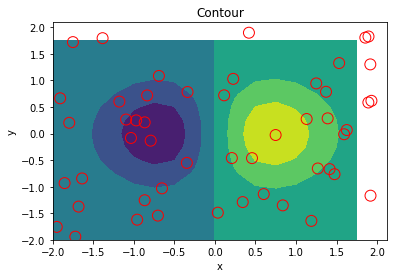

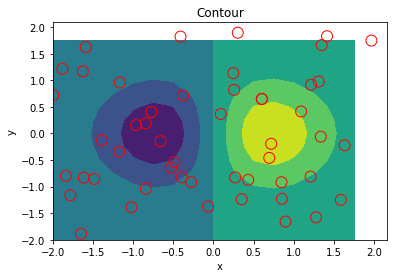

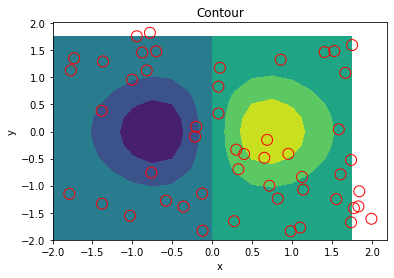

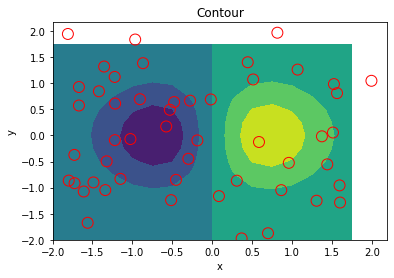

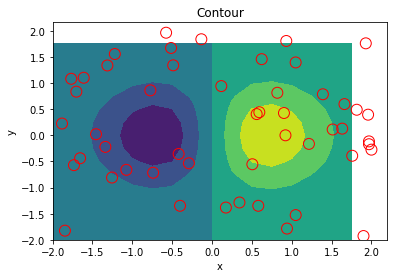

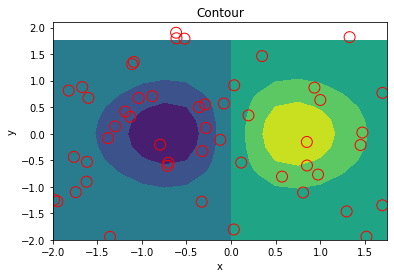

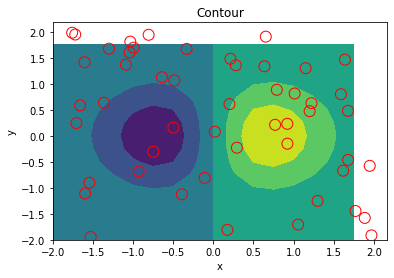

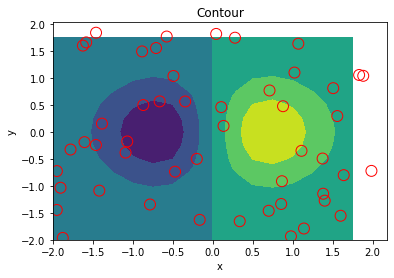

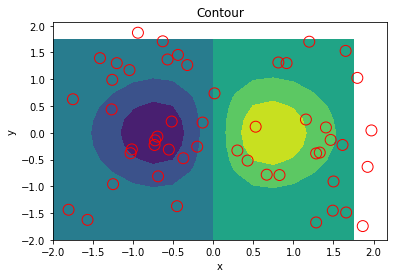

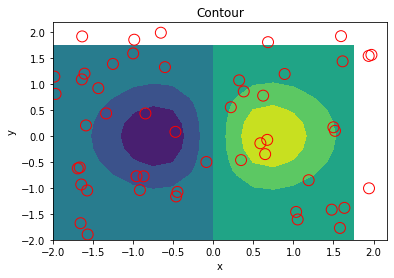

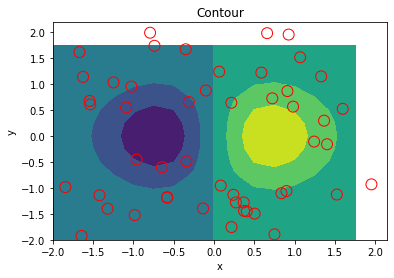

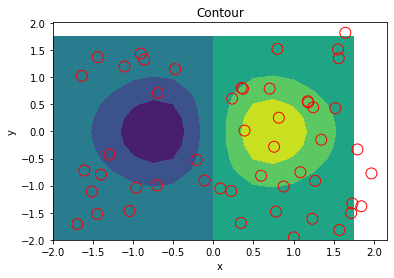

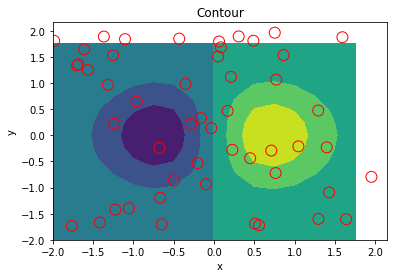

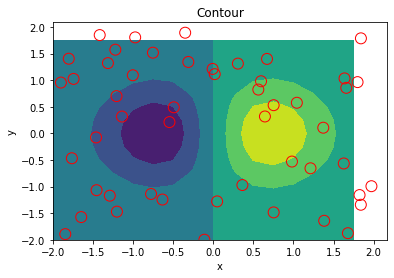

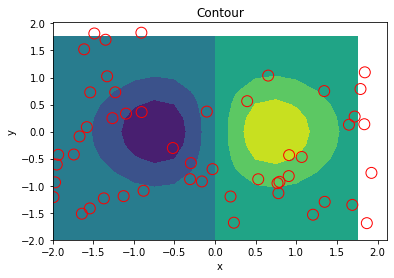

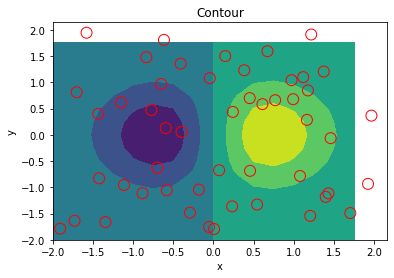

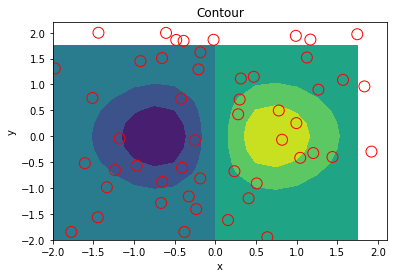

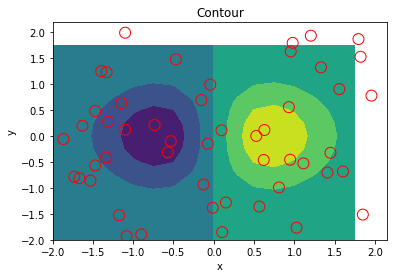

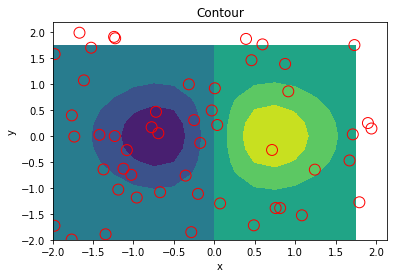

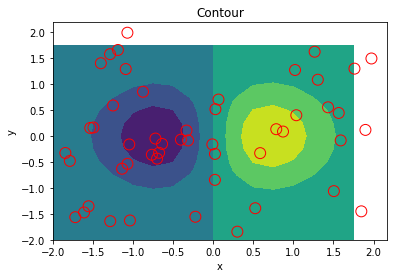

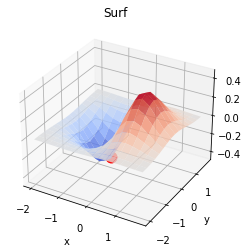

Mínimo global en
x=-0.562941527694365,
y=0.14548987528713875,
f(x,y)= f(-0.562941527694365, 0.14548987528713875


In [26]:
x = np.zeros((D,N))
aptitud = np.zeros(N)

for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)

for g in range(G):
    plot_contour(f, x, xl, xu)

    for i in range(N):
        fx = f(x[0, i], x[1, i])

        if fx >= 0:
            aptitud[i] = 1 / (1 + fx)
        else:
            aptitud[i] = 1 + np.abs(fx)

    y = np.zeros((D, N))

    for i in range(0, N, 2):
        r1 = Seleccion(aptitud)
        r2 = r1

        while r2 == r1:
            r2 = Seleccion(aptitud)

        y1, y2 = Cruza(x[:, r1], x[:, r2])

        y[:, i] = y1
        y[:, i+1] = y2

    y = Mutacion(y, pm, xl, xu)
    x = y.copy()

for i in range(N):
    fx = f(x[0, i], x[1, i])

    if fx >= 0:
        aptitud[i] = 1 / (1 + fx)
    else:
        aptitud[i] = 1 + abs(fx)

i_mejor = np.argmax(aptitud)
plot_surf(f, x, xl, xu, i_mejor)

print(f"Mínimo global en\nx={x[0,i_mejor]},\ny={x[1,i_mejor]},\nf(x,y)= f({x[0,i_mejor]}, {x[1,i_mejor]}")
